In [1]:
# run this block before u run the model and restart runtime before running other block.
pip install git+https://github.com/librosa/librosa

  Cloning https://github.com/librosa/librosa to /tmp/pip-req-build-whggqlp5
  Running command git clone -q https://github.com/librosa/librosa /tmp/pip-req-build-whggqlp5
     |████████████████████████████████| 3.6MB 1.3MB/s 
  Created wheel for librosa: filename=librosa-0.7.1-cp36-none-any.whl size=1611544 sha256=65577a619c0ba88f5252ac560c6f2975ed1b0c0d5a7a7b9ffaa18605fae39412
  Stored in directory: /tmp/pip-ephem-wheel-cache-llst8jln/wheels/ff/3e/4c/a872019d317d55de16e91a60bee1fb10a6404d1edb91fb4318
Successfully built librosa
  Found existing installation: numba 0.40.1
    Uninstalling numba-0.40.1:
      Successfully uninstalled numba-0.40.1
  Found existing installation: librosa 0.6.3
    Uninstalling librosa-0.6.3:
      Successfully uninstalled librosa-0.6.3


In [1]:
import numpy as np
import glob
import tensorflow as tf
import tensorflow.keras as tfk
import librosa
import librosa.display
import pickle
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Data Creation Part - Creates the stft spectograms and stores in a mentioned directory

In [3]:
"""
def get_time_domain_and_spectograms(train_wav_paths):        # given a list of file paths, returns corresponding time-domain samples and stft spectogram
  time_domain_train=[] 
  MFCC_spectograms_train=[]
  cnt=0
  for path in train_wav_paths:
    cnt+=1
    print("count-",cnt)
    y,sr=librosa.load(path,sr=16000)
    time_domain_train.append(y)
    #y=np.pad(y, (0,124621-y.shape[0]), 'constant', constant_values=0)
    print("sampling rate-",sr)
    print("signal length- ",len(y))
    spectogram=np.abs(librosa.stft(y,n_fft=1024,hop_length=512))
    print("spectogram shape- ",np.shape(spectogram))
    MFCC_spectograms_train.append(spectogram)
  return time_domain_train,MFCC_spectograms_train

train_wav_paths=[]
for x in glob.glob('/content/drive/My Drive/DLSP_Final_Project_VAE/TIMIT_full/train/*/*/*.wav', recursive=True):  # Change directory to your timit folder
    train_wav_paths.append(x)

test_wav_paths=[]
for x in glob.glob('/content/drive/My Drive/DLSP_Final_Project_VAE/TIMIT_full/test/*/*/*.wav', recursive=True):    # Change directory to your timit folder
    test_wav_paths.append(x)


time_domain_train,MFCC_spectograms_train=get_time_domain_and_spectograms(train_wav_paths)
time_domain_test,MFCC_spectograms_test=get_time_domain_and_spectograms(test_wav_paths)

train_data = [train_wav_paths,time_domain_train,MFCC_spectograms_train]
pickle_out = open("/content/drive/My Drive/DLSP_Final_Project_VAE/train_data.pickle","wb")           # Change directory to where you would like to save the stft spectograms
pickle.dump(train_data, pickle_out)
pickle_out.close()

test_data = [test_wav_paths,time_domain_test,MFCC_spectograms_test]
pickle_out = open("/content/drive/My Drive/DLSP_Final_Project_VAE/test_data.pickle","wb")           # Change directory to where you would like to save the stft spectograms
pickle.dump(test_data, pickle_out)
pickle_out.close()

print(len(train_wav_paths))     # The following code is just for reference
print(len(test_wav_paths))
print(len(time_domain_train))
print(len(MFCC_spectograms_train))

print(len(train_wav_paths))
print(len(test_wav_paths))
print(len(time_domain_test))
print(len(MFCC_spectograms_test))

"""


'\ndef get_time_domain_and_spectograms(train_wav_paths):        # given a list of file paths, returns corresponding time-domain samples and stft spectogram\n  time_domain_train=[] \n  MFCC_spectograms_train=[]\n  cnt=0\n  for path in train_wav_paths:\n    cnt+=1\n    print("count-",cnt)\n    y,sr=librosa.load(path,sr=16000)\n    time_domain_train.append(y)\n    #y=np.pad(y, (0,124621-y.shape[0]), \'constant\', constant_values=0)\n    print("sampling rate-",sr)\n    print("signal length- ",len(y))\n    spectogram=np.abs(librosa.stft(y,n_fft=1024,hop_length=512))\n    print("spectogram shape- ",np.shape(spectogram))\n    MFCC_spectograms_train.append(spectogram)\n  return time_domain_train,MFCC_spectograms_train\n\ntrain_wav_paths=[]\nfor x in glob.glob(\'/content/drive/My Drive/DLSP_Final_Project_VAE/TIMIT_full/train/*/*/*.wav\', recursive=True):  # Change directory to your timit folder\n    train_wav_paths.append(x)\n\ntest_wav_paths=[]\nfor x in glob.glob(\'/content/drive/My Drive/DLS

In [0]:
# In case you already have the files saved use this after changing directory. Otherwise comment this block. 

pickle_in = open("/content/drive/My Drive/DLSP_Final_Project_VAE/train_data.pickle","rb")
train_wav_paths,time_domain_train,MFCC_spectograms_train = pickle.load(pickle_in)


pickle_in = open("/content/drive/My Drive/DLSP_Final_Project_VAE/test_data.pickle","rb")
test_wav_paths,time_domain_test,MFCC_spectograms_test = pickle.load(pickle_in)

# Understanding, and preprocessing all data files into (513,29) numpy arrays, as the smallest file is (513,29)

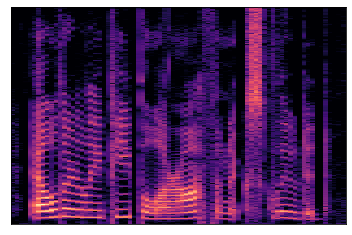

In [5]:
#checking reconstruction using griffinlim, This wont run if you dont run the first block and restart run time.
wav=librosa.griffinlim(MFCC_spectograms_test[0],n_iter=64,hop_length=512)
wav_name="/content/drive/My Drive/DLSP_Final_Project_VAE/test.wav"              #change directory.
librosa.output.write_wav(wav_name,wav,sr=16000)
librosa.display.specshow(librosa.amplitude_to_db(MFCC_spectograms_test[0]))

In [6]:
#all file are of size (513,x),  checking the max and min values of x
train_spectrum_lengths=[np.shape(i)[1] for i in MFCC_spectograms_train]
test_spectogram_lengths=[np.shape(i)[1] for i in MFCC_spectograms_test]
print(np.argmin(train_spectrum_lengths))

#print(max(train_spectrum_lengths))
#print(min(test_spectogram_lengths))
#print(max(test_spectogram_lengths))

1230


In [0]:

def pad_spect_to_equal_lengths(a,max_len=244):
  npad=((0,0),(0,max_len-np.shape(a)[1]))
  b=np.pad(a,pad_width=npad,mode='constant',constant_values=0)
  return b

#Below function takes as parameter a list of spectograms and creates (513,29) samples from the list of spectrograms 
def create_training_data_short_spectograms(spect_list):
  list_training=[]

  for spectogram in spect_list:
    for i in range(0,np.shape(spectogram)[1]-(np.shape(spectogram)[1]%29),29):
      list_training.append(spectogram[:,i:i+29])
  return list_training


# padded_MFCC_spectograms_train are not actually padded, 
# it is the array of data containing (513,29) chunk as each sample 
# needed to be normalized, standardized before passing into the model

padded_MFCC_spectograms_train=create_training_data_short_spectograms(MFCC_spectograms_train) 

In [8]:
# Ignore if you would like to.
# checking shapes to be sure, should be (513,29)
for i in MFCC_spectograms_test:
  print(np.shape(i))

(513, 77)
(513, 106)
(513, 111)
(513, 104)
(513, 97)
(513, 118)
(513, 110)
(513, 125)
(513, 114)
(513, 156)
(513, 121)
(513, 132)
(513, 126)
(513, 86)
(513, 139)
(513, 144)
(513, 139)
(513, 131)
(513, 233)
(513, 166)
(513, 69)
(513, 111)
(513, 120)
(513, 79)
(513, 107)
(513, 92)
(513, 132)
(513, 93)
(513, 119)
(513, 173)
(513, 101)
(513, 182)
(513, 95)
(513, 191)
(513, 123)
(513, 92)
(513, 93)
(513, 109)
(513, 108)
(513, 118)
(513, 69)
(513, 91)
(513, 77)
(513, 82)
(513, 74)
(513, 41)
(513, 124)
(513, 77)
(513, 65)
(513, 90)
(513, 80)
(513, 113)
(513, 128)
(513, 91)
(513, 111)
(513, 52)
(513, 77)
(513, 146)
(513, 76)
(513, 97)
(513, 59)
(513, 96)
(513, 69)
(513, 79)
(513, 99)
(513, 57)
(513, 156)
(513, 102)
(513, 74)
(513, 138)
(513, 106)
(513, 85)
(513, 51)
(513, 57)
(513, 53)
(513, 51)
(513, 142)
(513, 103)
(513, 69)
(513, 96)
(513, 79)
(513, 62)
(513, 94)
(513, 59)
(513, 70)
(513, 64)
(513, 110)
(513, 79)
(513, 45)
(513, 70)
(513, 59)
(513, 81)
(513, 80)
(513, 95)
(513, 61)
(513, 12

In [0]:
# spectogram normalization and scaling
padded_MFCC_spectograms_train=np.log(0.000001+np.array(padded_MFCC_spectograms_train)) 
padded_MFCC_spectograms_train=(padded_MFCC_spectograms_train-np.min(padded_MFCC_spectograms_train))/(np.max(padded_MFCC_spectograms_train)-np.min(padded_MFCC_spectograms_train)) 

# Model Architecture

In [10]:
# There might be a few extra variables that I am not using in this block because I made this code in a way that it could serve for multiple different architecture experiments.

num_examples=len(train_wav_paths)

batch_size = 100

images=tf.placeholder(tf.float32,[None,513,29]) 
input_images=tf.reshape(images,[-1,513,29,1]) 
dropout = 0.25

def conv_transpose(x, kernel_shape, outputShape, stride_val, name): 
  with tf.variable_scope(name):
    w = tf.get_variable("w",[kernel_shape[0], kernel_shape[1], outputShape[-1], x.get_shape()[-1]], initializer=tf.contrib.layers.variance_scaling_initializer())
    b = tf.get_variable("b",[outputShape[-1]], initializer=tf.constant_initializer(0.0))
    convt = tf.nn.conv2d_transpose(x, w, output_shape=outputShape, strides=[1,stride_val,stride_val,1])
    return convt

def encoder(input_images):
  additional=tf.layers.conv2d(input_images, filters=64, kernel_size=5, strides=1, padding='same', activation=tf.nn.leaky_relu,kernel_initializer= tf.contrib.layers.variance_scaling_initializer())
  L1=tf.layers.conv2d(additional, filters=64, kernel_size=5, strides=2, padding='same', activation=tf.nn.leaky_relu,kernel_initializer= tf.contrib.layers.variance_scaling_initializer())
  L1= tf.layers.dropout(L1, dropout)
  L2=tf.layers.conv2d(L1, filters=64, kernel_size=3, strides=2, padding='same', activation=tf.nn.leaky_relu,kernel_initializer= tf.contrib.layers.variance_scaling_initializer())
  L2= tf.layers.dropout(L2, dropout)
  L3=tf.layers.conv2d(L2, filters=10, kernel_size=3, strides=2, padding='same', activation=tf.nn.leaky_relu,kernel_initializer= tf.contrib.layers.variance_scaling_initializer())
  L3= tf.layers.dropout(L3, dropout)
  return L3

def decoder(latent_data, batch_size):
  L5=tf.nn.leaky_relu(conv_transpose(latent_data,[3,3],[tf.shape(latent_data)[0],129,8,64],2,"L5"))
  L5= tf.layers.dropout(L5, dropout)
  L6=tf.nn.leaky_relu(conv_transpose(L5,[3,3],[tf.shape(latent_data)[0],257,15,64],2,"L6"))
  L6= tf.layers.dropout(L6, dropout)
  L7=tf.nn.leaky_relu(conv_transpose(L6,[5,5],[tf.shape(latent_data)[0],513,29,64],2,"L7"))
  additional_dec=conv_transpose(L7,[5,5],[tf.shape(latent_data)[0],513,29,1],1,"additional")
  return tf.nn.sigmoid(additional_dec),tf.nn.relu(additional_dec)  # Final model uses sigmoid output.



encoder_output= encoder(input_images)
generated_images,logits=decoder(encoder_output, batch_size)

generated_flat = tf.reshape(generated_images, [-1, 513*29],name="doubt-1-sigmoid")
logits_flat = tf.reshape(logits, [-1, 513*29],name="doubt-1-relu")
images_flat=tf.reshape(input_images,[-1,513*29],name="doubt-2")


generation_loss=tf.reduce_sum(tf.squared_difference(generated_flat, images_flat), 1)
cost = tf.reduce_mean(generation_loss)  # generation loss and cost are same, there is no difference, mean of one value is that value itself.

optimizer = tf.train.AdamOptimizer(0.0000001).minimize(cost)


The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
Use `tf.keras.layers.Conv2D` instead.
Instructions for updating:
Please use `layer.__call__` method instead.
Instructions for updating:
Use keras.layers.dropout instead.


# Training

In [11]:
from sklearn.utils import shuffle
padded_MFCC_spectograms_train=shuffle(padded_MFCC_spectograms_train,random_state=0)

#validation set
validation_set=padded_MFCC_spectograms_train[-100:]

#training set
padded_MFCC_spectograms_train=padded_MFCC_spectograms_train[:-100]

sess=tf.Session()  
sess.run(tf.global_variables_initializer())


total_loss_epoch=[]
validation_loss_10epochs=[]
saver = tf.train.Saver(max_to_keep=3)

saver.restore(sess, "/content/drive/My Drive/DLSP_Final_Project_VAE/11December/autoencoder_normalized_standardized.ckpt")  # Change directory to restore the file

# comment the below part if you want to load the saved model.
"""
for epoch in range(0,1000):
  
  #train_spectrum_lengths,padded_MFCC_spectograms_train=shuffle(train_spectrum_lengths,padded_MFCC_spectograms_train,random_state=0)
  padded_MFCC_spectograms_train=shuffle(padded_MFCC_spectograms_train,random_state=0)
  
  
  
  total_loss_steps=[]

  for i in range(0,len(train_spectrum_lengths)-(len(train_spectrum_lengths)%batch_size),batch_size):
    batch_input=padded_MFCC_spectograms_train[i:i+batch_size]
    batch_input=np.nan_to_num(batch_input)

    _, total_loss=sess.run([optimizer, cost],feed_dict={images:batch_input})
    
    total_loss_steps.append(total_loss)
  
  
  total_loss_at=np.mean(total_loss_steps)
  
  print("epoch- ",epoch)
  print("total loss- ",total_loss_at)
  
  total_loss_epoch.append(total_loss_at)

  if epoch%10==0:
    #saving the model, calculating validation loss, saving loss values as it may crash at some point of training.
    saver.save(sess,"/content/drive/My Drive/DLSP_Final_Project_VAE/11December/autoencoder_normalized_standardized.ckpt")  # change directory to Save model 
    val_gen_loss, val_total_loss=sess.run([generation_loss,cost],feed_dict={images:validation_set})
    print("\n validation loss-",val_total_loss,"\n")
    validation_loss_10epochs.append(val_total_loss)
    loss_data = [total_loss_epoch,validation_loss_10epochs]
    pickle_out = open("/content/drive/My Drive/DLSP_Final_Project_VAE/11December/autoencoder_normalized_standardized-run-1.pickle","wb") # Change directory to Save the training, validation loss

    pickle.dump(loss_data, pickle_out)
    pickle_out.close()
"""


INFO:tensorflow:Restoring parameters from /content/drive/My Drive/DLSP_Final_Project_VAE/11December/autoencoder_normalized_standardized.ckpt


'\nfor epoch in range(0,1000):\n  \n  #train_spectrum_lengths,padded_MFCC_spectograms_train=shuffle(train_spectrum_lengths,padded_MFCC_spectograms_train,random_state=0)\n  padded_MFCC_spectograms_train=shuffle(padded_MFCC_spectograms_train,random_state=0)\n  \n  \n  \n  total_loss_steps=[]\n\n  for i in range(0,len(train_spectrum_lengths)-(len(train_spectrum_lengths)%batch_size),batch_size):\n    batch_input=padded_MFCC_spectograms_train[i:i+batch_size]\n    batch_input=np.nan_to_num(batch_input)\n\n    _, total_loss=sess.run([optimizer, cost],feed_dict={images:batch_input})\n    \n    total_loss_steps.append(total_loss)\n  \n  \n  total_loss_at=np.mean(total_loss_steps)\n  \n  print("epoch- ",epoch)\n  print("total loss- ",total_loss_at)\n  \n  total_loss_epoch.append(total_loss_at)\n\n  if epoch%10==0:\n    #saving the model, calculating validation loss, saving loss values as it may crash at some point of training.\n    saver.save(sess,"/content/drive/My Drive/DLSP_Final_Project_VAE/

[181.58002, 171.28136, 165.96654, 161.09, 156.08194, 148.56194, 139.03612, 126.751595, 119.864044, 113.053734, 107.90167, 103.5468, 100.260414, 98.332565, 95.70991, 93.20299, 91.23967, 88.81858, 87.48989, 85.22014, 83.60147, 80.97613, 78.574265, 76.38872, 73.25824, 70.9896, 67.833694, 65.1004, 62.290802, 60.067616, 57.60609, 55.538876, 53.561676, 51.440563, 49.654015, 48.190525, 46.589367, 45.43208, 44.30722, 43.434505, 42.60666, 41.814632, 41.321198, 40.493004, 40.109776, 39.470207, 39.140594, 38.670345, 38.327908, 37.896603, 37.461575, 37.384693, 36.839573, 36.60131, 36.226646, 35.893703, 35.707287, 35.43884, 35.25623, 34.988285, 34.68502, 34.445118, 34.237263, 34.0089, 33.739624, 33.61577, 33.43084, 33.26599, 33.057106, 32.848766, 32.649025, 32.58834, 32.28207, 32.222477, 32.023396, 31.849258, 31.785408, 31.564465, 31.474731, 31.314419, 31.227154, 30.951109, 30.864937, 30.836231, 30.732857, 30.585773, 30.599277, 30.305765, 30.204683, 30.114208, 30.042112, 29.956213, 29.867466, 29.76

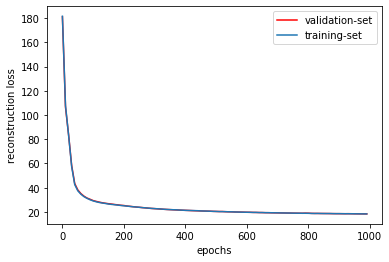

In [14]:
# Plotted training plot

from matplotlib import pyplot as plt

pickle_in = open("/content/drive/My Drive/DLSP_Final_Project_VAE/11December/autoencoder_normalized_standardized-run-1.pickle","rb")
a,b = pickle.load(pickle_in)
print(a)
print(b)

plt.plot([10*i for i in range(0,100)],b, label="validation-set",color='r')
plt.plot([10*i for i in range(0,100)],[a[10*i] for i in range(0,100)],label="training-set")
plt.xlabel('epochs')
plt.ylabel('reconstruction loss')
plt.legend()
plt.show()

# Testing on One File

shape of input test file to the model- (513, 29)
shape of input test file to the model- (513, 29)
shape of input test file to the model- (513, 29)
(513, 77, 1)
shape of test file- (513, 77)


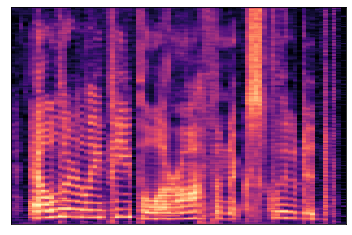

In [12]:
# Run the following block to check the spectogram for reconstructed file corresponding to the spectogram plotted earlier.

#takes the test file, converts single test file into (n,513,29), left over part is padded for test files
def create_test_file(file):
  input_files=[]
  for i in range(0,np.shape(file)[1],29):
    input_files.append(file[:,i:i+29])
  padded=29-np.shape(input_files[-1])[1]
  input_files[-1]=pad_spect_to_equal_lengths(input_files[-1],max_len=29)
  for i in input_files:
    print("shape of input test file to the model-",np.shape(i))
  return input_files,padded

for i in range(0,len(MFCC_spectograms_test)):

  test_input,padding=create_test_file(MFCC_spectograms_test[i])

  # Hard coded normalization and scaling
  test_input=np.log(0.000001+np.array(test_input)) 
  test_input=(test_input-(-13.814987))/((3.84446)-(-13.814987))

  test_total_cost,  test_generate_images=sess.run([cost, generated_images],feed_dict={images:test_input})

  #print(np.max(test_generate_images))

  # Hard coded de-normalization and rescaling
  test_generate_images=(test_generate_images*((3.84446)-(-13.814987))) + (-13.814987)
  test_generated_images_unnormed = np.exp(test_generate_images) - 0.000001 

  #build the padded result back from (n,513,29) to (513,m) 
  result=np.hstack(test_generated_images_unnormed)
  print(np.shape(result[:,:-padding]))

  #remove the padded part
  result=np.reshape(result[:,:-padding],[np.shape(result)[0],np.shape(result)[1]-padding])

  #shape of result
  print("shape of test file-",np.shape(result))

  #spectogram plotting 
  librosa.display.specshow(librosa.amplitude_to_db(result))
  
  #use griffinlim to estimate phase and convert back to audio
  wav=librosa.griffinlim(result,n_iter=64,hop_length=512)
  wav_name="/content/drive/My Drive/DLSP_Final_Project_VAE/"+str(i)+".wav"
  librosa.output.write_wav(wav_name,wav,sr=16000) 
  break 

# Testing On All Files

In [0]:
# Run the following to generate the reconstructed files. Change the directories in the below code

#takes the test file, converts single test file into (n,513,29), left over part is padded for test files
def create_test_file(file):
  input_files=[]
  for i in range(0,np.shape(file)[1],29):
    input_files.append(file[:,i:i+29])
  padded=29-np.shape(input_files[-1])[1]
  input_files[-1]=pad_spect_to_equal_lengths(input_files[-1],max_len=29)
  #for i in input_files:
  #  print("shape of input test file to the model-",np.shape(i))
  return input_files,padded

for i in range(0,len(MFCC_spectograms_test)):

  print("iter- ",i)
  print(np.shape(MFCC_spectograms_test[i]))
  test_input,padding=create_test_file(MFCC_spectograms_test[i])
  #print("padding-",padding)
  #normalization and standardize
  test_input=np.log(0.000001+np.array(test_input)) 
  test_input=(test_input-(-13.814987))/((3.84446)-(-13.814987))

  test_total_cost,  test_generate_images=sess.run([cost, generated_images],feed_dict={images:test_input})

  #print(np.max(test_generate_images))

  #de-normalization and de standardize
  test_generate_images=(test_generate_images*((3.84446)-(-13.814987))) + (-13.814987)
  test_generated_images_unnormed = np.exp(test_generate_images) - 0.000001 

  #build the padded result back from (n,513,29) to (513,m) 
  result=np.hstack(test_generated_images_unnormed)
  

  #remove the padded part
  if padding!=0:
    print(np.shape(result[:,:-padding]))
    result=np.reshape(result[:,:-padding],[np.shape(result)[0],np.shape(result)[1]-padding])
  else:
    result=np.reshape(result[:,:],[np.shape(result)[0],np.shape(result)[1]-padding])

  #shape of result
  print("shape of test file-",np.shape(result))

  #spectogram plotting 
  #librosa.display.specshow(librosa.amplitude_to_db(result))
  
  original_wav=librosa.griffinlim(MFCC_spectograms_test[i],n_iter=64,hop_length=512)
  original_wav_name="/content/drive/My Drive/DLSP_Final_Project_VAE/OUTPUT_FINAL/"+str(i)+"_original.wav" # Change directory to write output original file reconstructed with Griffin-Lim.
  librosa.output.write_wav(original_wav_name,original_wav,sr=16000)

  #use griffinlim to estimate phase and convert back to audio
  wav=librosa.griffinlim(result,n_iter=64,hop_length=512)
  wav_name="/content/drive/My Drive/DLSP_Final_Project_VAE/OUTPUT_FINAL/"+str(i)+"_generated.wav"  # Change directory to write output generated file reconstructed with Griffin-Lim.
  librosa.output.write_wav(wav_name,wav,sr=16000) 

# Calculating SNR and PESQ Values 

In [0]:
import os
!pip install pesq
from pesq import pesq
import math

directory="/content/drive/My Drive/DLSP_Final_Project_VAE/OUTPUT_FINAL/"

list_names=os.listdir("/content/drive/My Drive/DLSP_Final_Project_VAE/OUTPUT_FINAL/")


from scipy.io import wavfile

def SNR(infile,outfile):
  sr_i,i = wavfile.read(infile)
  sr_o,o = wavfile.read(outfile)
  return 10*math.log10(np.sum(i**2)/np.sum(o**2))



def PESQ(infile,outfile):
    rate, ref = wavfile.read(infile)
    rate, deg = wavfile.read(outfile)
    ref=np.array(ref)
    deg=np.array(deg)
    return pesq(rate, ref, deg, 'wb'),pesq(rate, ref, deg, 'nb')

list_pesq_nb=[]
list_pesq_wb=[]
list_snr=[]

print(list_names)

for i in range(0,50):
  orig=None
  rec=None
  for j in list_names:
    if j.startswith(str(i)+'_original'):
      orig=j
      break
  for j in list_names:
    if j.startswith(str(i)+'_generated'):
      rec=j
      break
  original_path=directory+orig
  reconstructed_path=directory+rec
  print(original_path)
  print(reconstructed_path)
  SNR_val=SNR(original_path, reconstructed_path)
  pesq_wb, pesq_nb = PESQ(original_path, reconstructed_path)
  list_snr.append(SNR_val)
  list_pesq_nb.append(pesq_nb)
  list_pesq_wb.append(pesq_wb)
  print("SNR-",SNR_val)
  print("pesq nb-",pesq_nb)
  print("pesq wb-",pesq_wb)
print("mean SNR-",np.mean(list_snr))
print("mean PESQ NB-",np.mean(list_pesq_nb))
print("mean PESQ WB-",np.mean(list_pesq_wb))